  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

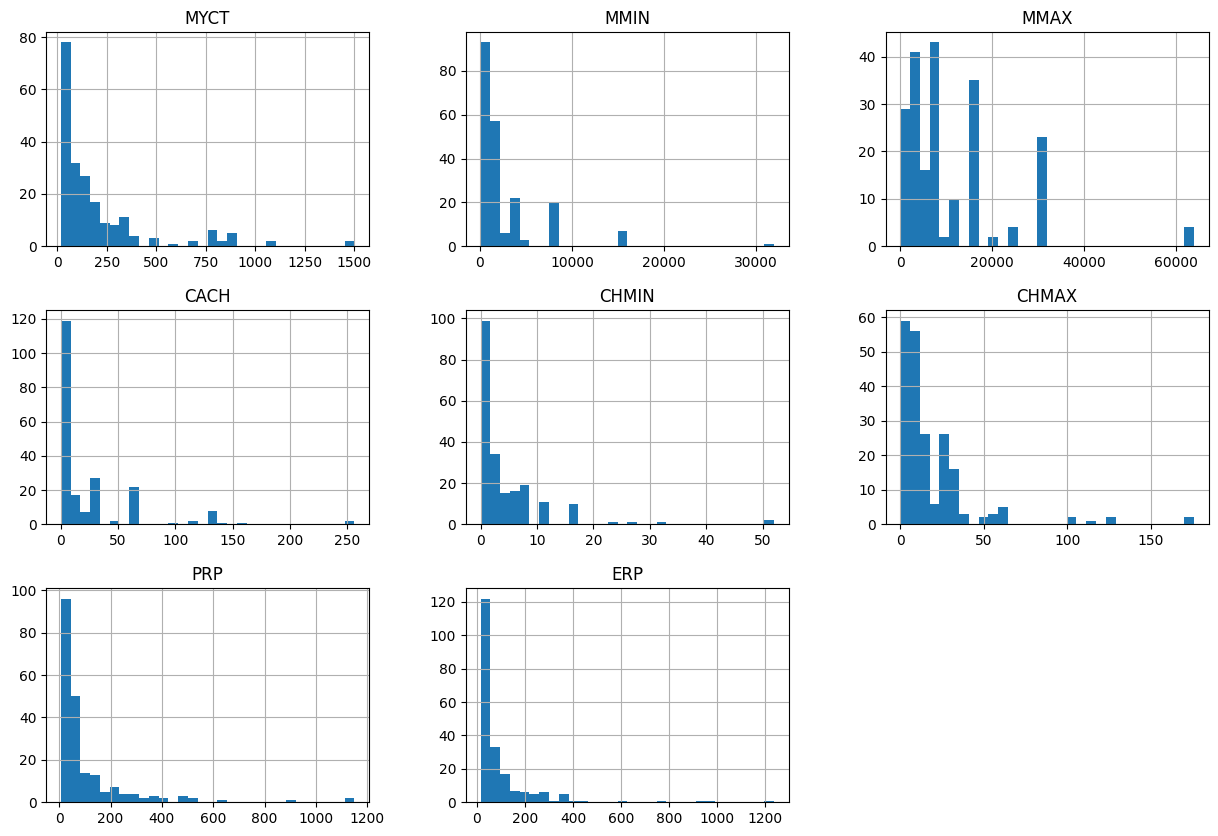

Best Parameters: {'ridge__alpha': 10}
Best CV Score (MSE): 5753.326323177162
Train MSE: 3139.175978783132
Train MAE: 33.95901148560646
Train R^2: 0.8367092002561751
Test MSE: 5962.188189044251
Test MAE: 47.92491403877126
Test R^2: 0.882880441095135
Cross-validated MSE: 5753.326323177162
Cross-validated MSE: 39.20256616286304
Cross-validated MSE: 0.6822253343501951


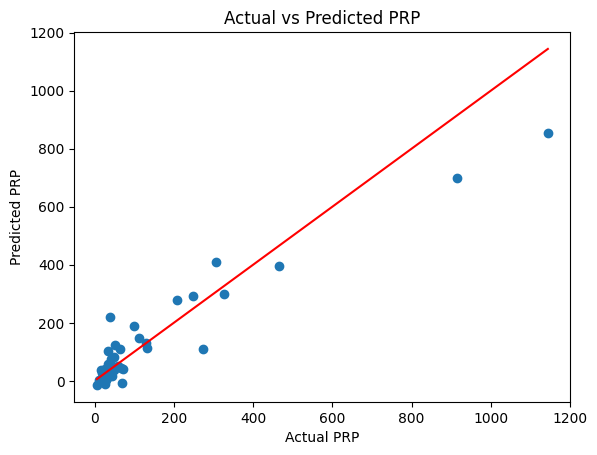

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
data = pd.read_csv('machine.data_update.csv')

# 데이터 확인
print(data.head())
print(data.info())
print(data.describe())

# 데이터 컬럼명 지정 (만약 데이터셋에 헤더가 없는 경우)
data.columns = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

# 필요 없는 열 제거 (vendor_name, model_name, ERP 등)
data = data.drop(columns=['vendor_name', 'model_name'])

# 결측치 확인
print(data.isnull().sum())

# 히스토그램
data.hist(bins=30, figsize=(15, 10))
plt.show()

# 특징과 타겟 변수 분리
features = data.drop(columns=['PRP', 'ERP'])
target = data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 파이프라인 생성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100]
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 성능 확인
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best Parameters:", best_params)
print("Best CV Score (MSE):", best_score)


# best_estimator_ 추출
best_model = grid_search.best_estimator_

# 학습 데이터에 대한 예측
y_train_pred = best_model.predict(X_train)

# 테스트 데이터에 대한 예측
y_test_pred = best_model.predict(X_test)

# 학습 데이터 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 테스트 데이터 성능 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 교차 검증
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

cv_mae_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_mae_scores.mean()

cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()

# 결과 출력
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train R^2: {train_r2}")

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R^2: {test_r2}")

print(f"Cross-validated MSE: {cv_mse}")
print(f"Cross-validated MSE: {cv_mae}")
print(f"Cross-validated MSE: {cv_r2}")

# 예측 값과 실제 값 시각화
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.show()

  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 no

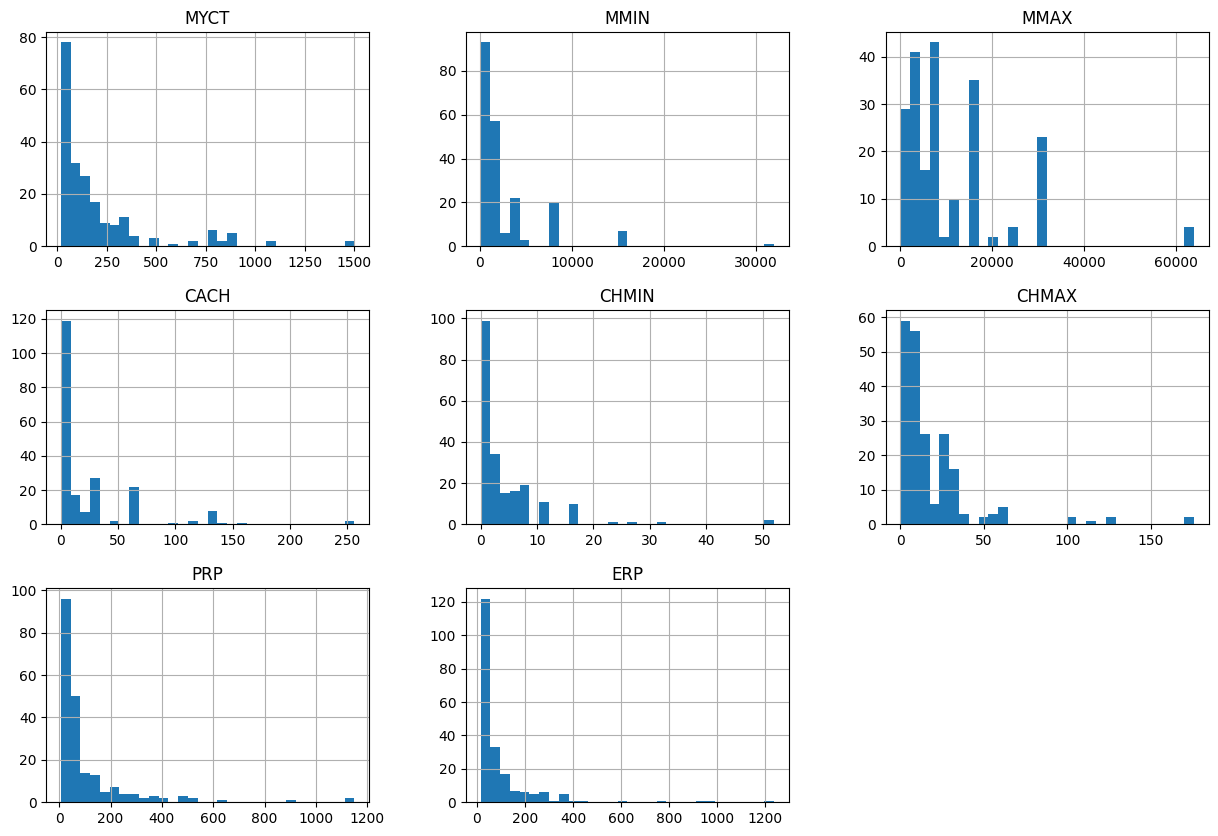

Best parameters for ridge: {'ridge__alpha': 100}
Best cross-validated R^2 for ridge: 0.7438592905560977
Best parameters for lasso: {'lasso__alpha': 10}
Best cross-validated R^2 for lasso: 0.6903210349441335
Best parameters for elasticnet: {'elasticnet__alpha': 1, 'elasticnet__l1_ratio': 0.1}
Best cross-validated R^2 for elasticnet: 0.7431796195418803
Best parameters for gbr: {'gbr__learning_rate': 0.1, 'gbr__n_estimators': 50}
Best cross-validated R^2 for gbr: 0.7942058635960557
Train MSE: 311.8626759662922
Train MAE: 12.848437170006026
Train R^2: 0.9837778110838739
Test MSE: 8118.5528108667395
Test MAE: 38.8677832897553
Test R^2: 0.8405214169687277
Cross-validated MSE: 4869.940153219075
Cross-validated MAE: 29.97557135803347
Cross-validated R^2: 0.7912158625146699


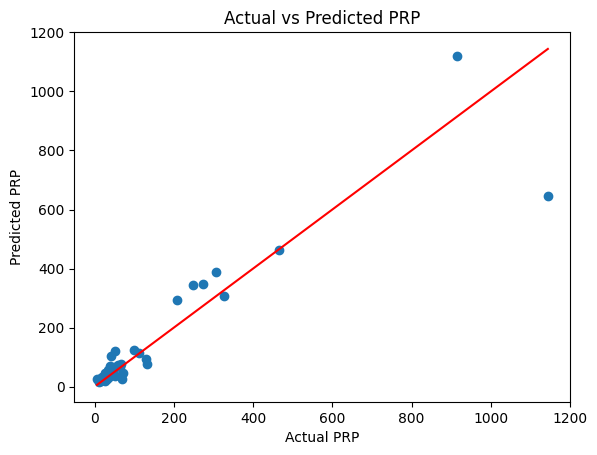

In [8]:
# R^2가 85% 이상이 나오도록 모델을 개선

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# 데이터 불러오기
data = pd.read_csv('machine.data_update.csv')

# 데이터 확인
print(data.head())
print(data.info())
print(data.describe())

# 데이터 컬럼명 지정 (만약 데이터셋에 헤더가 없는 경우)
data.columns = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

# 필요 없는 열 제거 (vendor_name, model_name, ERP 등)
data = data.drop(columns=['vendor_name', 'model_name'])

# 결측치 확인
print(data.isnull().sum())

# 히스토그램
data.hist(bins=30, figsize=(15, 10))
plt.show()

# 특징과 타겟 변수 분리
features = data.drop(columns=['PRP', 'ERP'])
target = data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 다양한 모델을 위한 파이프라인 생성
pipelines = {
    'ridge': Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())]),
    'elasticnet': Pipeline([('scaler', StandardScaler()), ('elasticnet', ElasticNet())]),
    'gbr': Pipeline([('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())])
}

# 하이퍼파라미터 그리드 설정
param_grids = {
    'ridge': {'ridge__alpha': [0.1, 1, 10, 100]},
    'lasso': {'lasso__alpha': [0.1, 1, 10, 100]},
    'elasticnet': {'elasticnet__alpha': [0.1, 1, 10, 100], 'elasticnet__l1_ratio': [0.1, 0.5, 0.9]},
    'gbr': {'gbr__n_estimators': [50, 100, 200], 'gbr__learning_rate': [0.01, 0.1, 0.2]}
}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝 및 모델 선택
best_models = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validated R^2 for {name}: {grid_search.best_score_}")

# 최적 모델 선택
best_model = best_models['gbr']  # 예시로 GradientBoostingRegressor 선택

# 학습 데이터에 대한 예측
y_train_pred = best_model.predict(X_train)

# 테스트 데이터에 대한 예측
y_test_pred = best_model.predict(X_test)

# 학습 데이터 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 테스트 데이터 성능 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 교차 검증
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

cv_mae_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_mae_scores.mean()

cv_r2_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_r2 = cv_r2_scores.mean()

# 결과 출력
print(f"Train MSE: {train_mse}")
print(f"Train MAE: {train_mae}")
print(f"Train R^2: {train_r2}")

print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R^2: {test_r2}")

print(f"Cross-validated MSE: {cv_mse}")
print(f"Cross-validated MAE: {cv_mae}")
print(f"Cross-validated R^2: {cv_r2}")

# 예측 값과 실제 값 시각화
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # 대각선
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.show()

               Model              Data          MSE        MAE       R^2
0  Linear Regression             Train  3117.658905  35.122006  0.837828
1  Linear Regression              Test  5633.068156  48.068801  0.889346
2  Linear Regression  Cross Validation  5941.453778  40.989729  0.650822
3     Best_estimator             Train  3139.175979  33.959011  0.836709
4     Best_estimator              Test  5962.188189  47.924914  0.882880
5     Best_estimator  Cross Validation  5753.326323  39.202566  0.682225


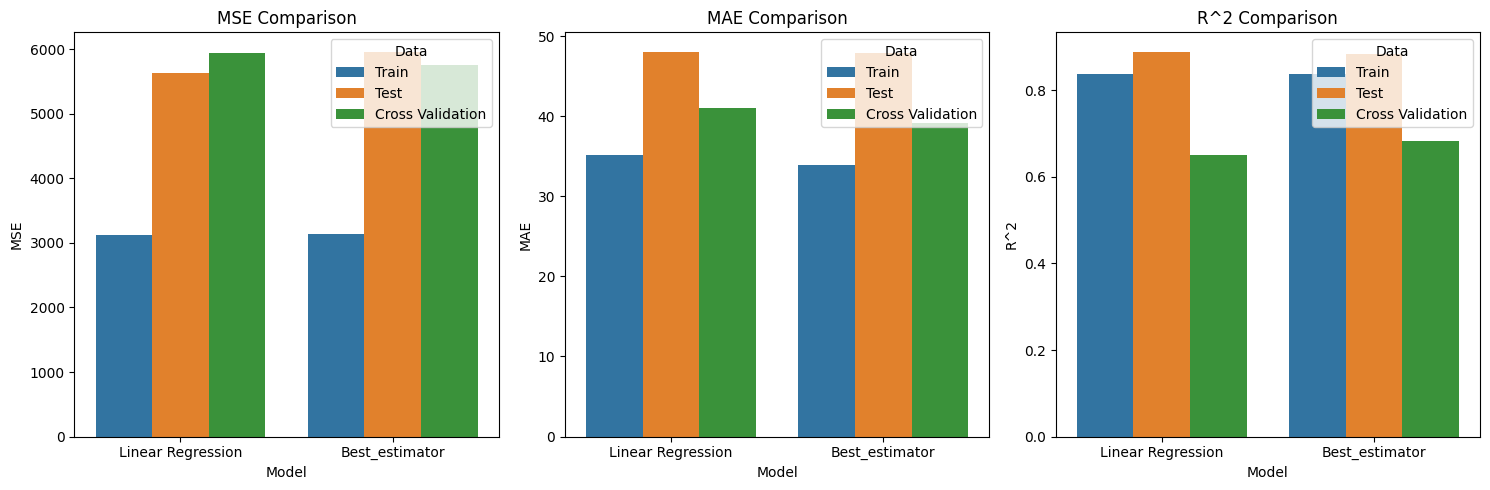

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 1 성능 지표 (Linear Regression)
model_1_metrics = {
    'Model': ['Linear Regression', 'Linear Regression', 'Linear Regression'],
    'Data': ['Train', 'Test', 'Cross Validation'],
    'MSE': [3117.658905430178, 5633.068155793257, 5941.453778179226],
    'MAE': [35.12200634651684, 48.06880134700476, 40.98972927246382],
    'R^2': [0.8378284557995717, 0.8893455830696775, 0.650822482173121]
}

# 모델 2 성능 지표 (Best Estimator from Ridge)
model_2_metrics = {
    'Model': ['Best_estimator', 'Best_estimator', 'Best_estimator'],
    'Data': ['Train', 'Test', 'Cross Validation'],
    'MSE': [3139.175978783132, 5962.188189044251, 5753.326323177162],
    'MAE': [33.95901148560646, 47.92491403877126, 39.20256616286304],
    'R^2': [0.8367092002561751, 0.882880441095135, 0.6822253343501951]
}

# 데이터프레임 생성
df_model_1 = pd.DataFrame(model_1_metrics)
df_model_2 = pd.DataFrame(model_2_metrics)
df_metrics = pd.concat([df_model_1, df_model_2], ignore_index=True)

# 데이터프레임 출력
print(df_metrics)

# MSE 비교
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', hue='Data', data=df_metrics)
plt.title('MSE Comparison')

# MAE 비교
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', hue='Data', data=df_metrics)
plt.title('MAE Comparison')

# R^2 비교
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R^2', hue='Data', data=df_metrics)
plt.title('R^2 Comparison')

plt.tight_layout()
plt.show()